## Лабораторная работа 7

### Вариант 10

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
from ipywidgets import interact

Задание:

Решить краевую задачу для дифференциального уравнения эллиптического типа. 

Аппроксимацию уравнения произвести с использованием центрально-разностной схемы. 

Для решения дискретного аналога применить следующие методы: метод простых итераций (метод Либмана), метод Зейделя, метод простых итераций с верхней релаксацией. 

Вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением. 

Исследовать зависимость погрешности от сеточных параметров

Вариант 10

In [2]:
alph1 = 0
beta1 = 1
phi1 = lambda y: math.exp(-y) * math.cos(y)

alph2 = 0
beta2 = 1
phi2 = lambda y: 0

alph3 = 0
beta3 = 1
phi3 = lambda x: math.exp(-x) * math.cos(x)

alph4 = 0
beta4 = 1
phi4 = lambda x: 0 

a = -2
b = -2
c = -4

l1 = [0, math.pi/2]
l2 = [0, math.pi/2]

def U(x, y):
    return np.exp(-x-y) * np.cos(x) * np.cos(y)

метод простых итераций (метод Либмана)

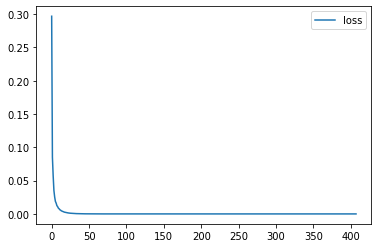

In [3]:
def Libman(l1, l2, hx, hy, eps):
    x = np.arange(l1[0], l1[1], hx)
    y = np.arange(l2[0], l2[1], hy)
    n_x = len(x)
    n_y = len(y)
    u_0_j = np.array([phi1(i) / beta1 for i in y])
    u_l_j = np.array([phi2(i) / beta2 for i in y])
    u_i_0 = np.array([phi3(i) / beta3 for i in x])
    u_i_l = np.array([phi4(i) / beta4 for i in x])

    u_k = np.array([np.zeros_like(u_i_0) for _ in range(n_y)], dtype=np.float64)
    u_k[0] = np.array(u_i_0)
    u_k[-1] = np.array(u_i_l)
    u_k = u_k.T
    u_k[0] = np.array(u_0_j)
    u_k[-1] =np.array(u_l_j)
    
    all_loss = []

    while(True):
        u_k_pred = np.copy(u_k)
        loss = 0
        for i in range(1, n_x - 1):
            for j in range(1, n_y - 1):
                u_k[i][j] = u_k_pred[i+1][j] * (1/hx**2 - a/hx) + u_k_pred[i-1][j] * (1/hx**2 + a/hx) + u_k_pred[i][j+1] * (1/hy**2 - b/hy) + u_k_pred[i][j-1] * (1/hy**2 + b/hy)
                u_k[i][j] /= (2 / hx**2 + 2 / hy**2 + c)
                loss = max(u_k[i][j] - u_k_pred[i][j], loss)
        all_loss += [loss]
        if (all_loss[-1] <= eps) : break

    plt.plot(np.arange(len(all_loss)), all_loss, label = 'loss')
    plt.legend()
    return u_k


hx, hy = math.pi / 20, math.pi / 20
eps = 0e-100
u_pred = Libman(l1, l2, hx, hy, eps)


In [4]:
def get_point(l1, l2, hx, hy, u_pred):

    x = np.arange(l1[0], l1[1], hx)
    y = np.arange(l2[0], l2[1], hy)

    xv, yv = np.meshgrid(x, y)
    U_true = U(xv, yv)

    U_pred = u_pred.T
    
    return xv, yv, U_true, U_pred
      

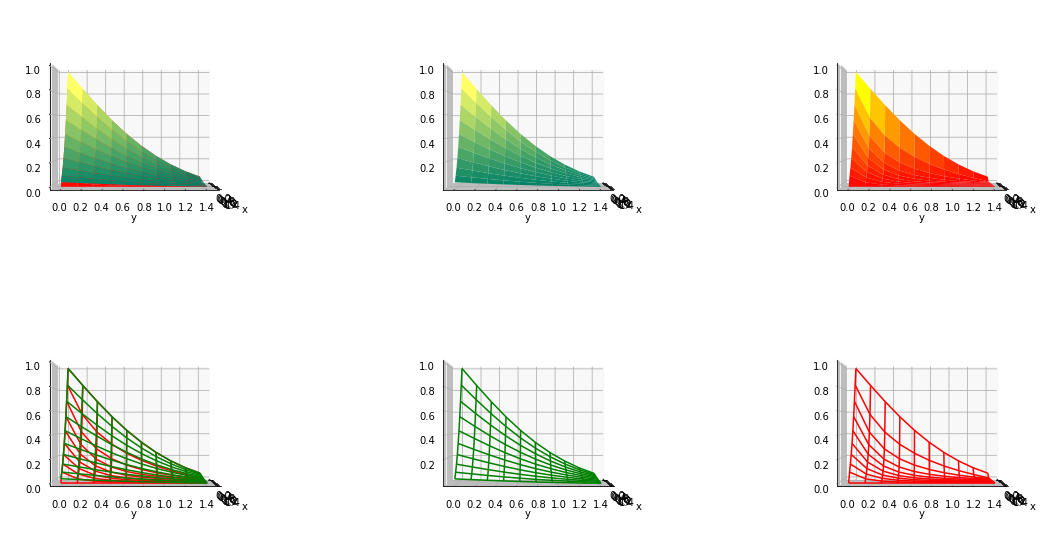

In [10]:
X, Y, U_true, U_pred = get_point(l1, l2, hx, hy, u_pred)

%matplotlib inline
def plot_met(i=0, j = 0):
    fig = plt.figure()

    fig.set_figwidth(20)
    fig.set_figheight(10)

    ax = fig.add_subplot(2, 3, 1, projection='3d')
    ax.plot_surface(X, Y, U_pred, cmap='autumn')
    ax.plot_surface(X, Y, U_true, cmap = 'summer')
    ax.view_init(i, j)
    ax.set_xlabel('x')
    ax.set_ylabel('y');

    ax = fig.add_subplot(2, 3, 4, projection='3d')
    ax.plot_wireframe(X, Y, U_pred, color = 'r')
    ax.plot_wireframe(X, Y, U_true, color = 'g')
    ax.view_init(i, j)
    ax.set_xlabel('x')
    ax.set_ylabel('y');

    ax = fig.add_subplot(2, 3, 2, projection='3d')
    ax.plot_surface(X, Y, U_true, cmap = 'summer')
    ax.view_init(i, j)
    ax.set_xlabel('x')
    ax.set_ylabel('y');

    ax = fig.add_subplot(2, 3, 5, projection='3d')
    ax.plot_wireframe(X, Y, U_true, color = 'g')
    ax.view_init(i, j)
    ax.set_xlabel('x')
    ax.set_ylabel('y');

    ax = fig.add_subplot(2, 3, 3, projection='3d')
    ax.plot_surface(X, Y, U_pred, cmap='autumn')
    ax.view_init(i, j)
    ax.set_xlabel('x')
    ax.set_ylabel('y');

    ax = fig.add_subplot(2, 3, 6, projection='3d')
    ax.plot_wireframe(X, Y, U_pred, color = 'r')
    ax.view_init(i, j)
    ax.set_xlabel('x')
    ax.set_ylabel('y');

    plt.show()
    
# interact(plot_met, i = (-180, 180), j = (-180, 180));
i, j = 0, 0
fig = plt.figure()

fig.set_figwidth(20)
fig.set_figheight(10)

ax = fig.add_subplot(2, 3, 1, projection='3d')
ax.plot_surface(X, Y, U_pred, cmap='autumn')
ax.plot_surface(X, Y, U_true, cmap = 'summer')
ax.view_init(i, j)
ax.set_xlabel('x')
ax.set_ylabel('y');

ax = fig.add_subplot(2, 3, 4, projection='3d')
ax.plot_wireframe(X, Y, U_pred, color = 'r')
ax.plot_wireframe(X, Y, U_true, color = 'g')
ax.view_init(i, j)
ax.set_xlabel('x')
ax.set_ylabel('y');

ax = fig.add_subplot(2, 3, 2, projection='3d')
ax.plot_surface(X, Y, U_true, cmap = 'summer')
ax.view_init(i, j)
ax.set_xlabel('x')
ax.set_ylabel('y');

ax = fig.add_subplot(2, 3, 5, projection='3d')
ax.plot_wireframe(X, Y, U_true, color = 'g')
ax.view_init(i, j)
ax.set_xlabel('x')
ax.set_ylabel('y');

ax = fig.add_subplot(2, 3, 3, projection='3d')
ax.plot_surface(X, Y, U_pred, cmap='autumn')
ax.view_init(i, j)
ax.set_xlabel('x')
ax.set_ylabel('y');

ax = fig.add_subplot(2, 3, 6, projection='3d')
ax.plot_wireframe(X, Y, U_pred, color = 'r')
ax.view_init(i, j)
ax.set_xlabel('x')
ax.set_ylabel('y');

plt.show()

метод Зейделя

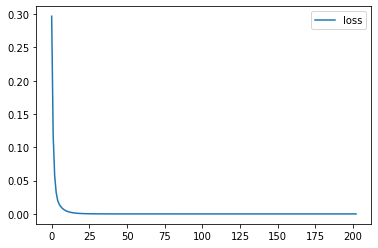

In [6]:
def Zeidel(l1, l2, hx, hy, eps):
    x = np.arange(l1[0], l1[1], hx)
    y = np.arange(l2[0], l2[1], hy)
    n_x = len(x)
    n_y = len(y)
    u_0_j = np.array([phi1(i) / beta1 for i in y])
    u_l_j = np.array([phi2(i) / beta2 for i in y])
    u_i_0 = np.array([phi3(i) / beta3 for i in x])
    u_i_l = np.array([phi4(i) / beta4 for i in x])

    u_k = np.array([np.zeros_like(u_i_0) for _ in range(n_y)], dtype=np.float64)
    u_k[0] = np.array(u_i_0)
    u_k[-1] = np.array(u_i_l)
    u_k = u_k.T
    u_k[0] = np.array(u_0_j)
    u_k[-1] =np.array(u_l_j)
    
    all_loss = []

    while(True):
        u_k_pred = np.copy(u_k)
        loss = 0
        for i in range(1, n_x - 1):
            for j in range(1, n_y - 1):
                u_k[i][j] = u_k[i+1][j] * (1/hx**2 - a/hx) + u_k[i-1][j] * (1/hx**2 + a/hx) + u_k[i][j+1] * (1/hy**2 - b/hy) + u_k[i][j-1] * (1/hy**2 + b/hy)
                u_k[i][j] /= (2 / hx**2 + 2 / hy**2 + c)
                loss = max(u_k[i][j] - u_k_pred[i][j], loss)
        all_loss += [loss]
        if (all_loss[-1] <= eps) : break

    plt.plot(np.arange(len(all_loss)), all_loss, label = 'loss')
    plt.legend()
    return u_k


hx, hy = math.pi / 20, math.pi / 20
eps = 0e-100
u_pred_z = Zeidel(l1, l2, hx, hy, eps)


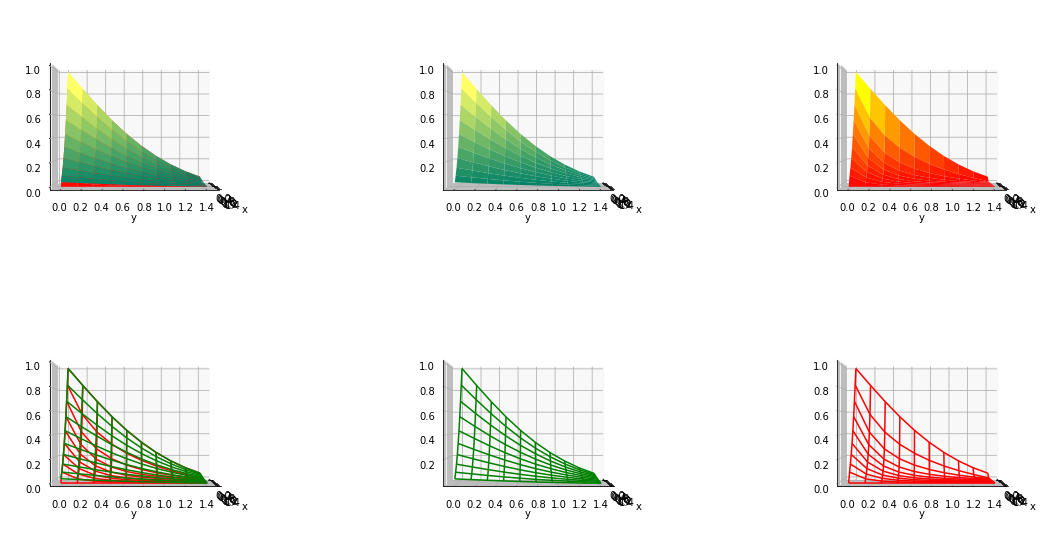

In [11]:
X_z, Y_z, U_true_z, U_pred_z = get_point(l1, l2, hx, hy, u_pred_z)

%matplotlib inline
def plot_met(i=0, j = 0):
    X, Y, U_true, U_pred = X_z, Y_z, U_true_z, U_pred_z
    fig = plt.figure()

    fig.set_figwidth(20)
    fig.set_figheight(10)

    ax = fig.add_subplot(2, 3, 1, projection='3d')
    ax.plot_surface(X, Y, U_pred, cmap='autumn')
    ax.plot_surface(X, Y, U_true, cmap = 'summer')
    ax.view_init(i, j)
    ax.set_xlabel('x')
    ax.set_ylabel('y');

    ax = fig.add_subplot(2, 3, 4, projection='3d')
    ax.plot_wireframe(X, Y, U_pred, color = 'r')
    ax.plot_wireframe(X, Y, U_true, color = 'g')
    ax.view_init(i, j)
    ax.set_xlabel('x')
    ax.set_ylabel('y');

    ax = fig.add_subplot(2, 3, 2, projection='3d')
    ax.plot_surface(X, Y, U_true, cmap = 'summer')
    ax.view_init(i, j)
    ax.set_xlabel('x')
    ax.set_ylabel('y');

    ax = fig.add_subplot(2, 3, 5, projection='3d')
    ax.plot_wireframe(X, Y, U_true, color = 'g')
    ax.view_init(i, j)
    ax.set_xlabel('x')
    ax.set_ylabel('y');

    ax = fig.add_subplot(2, 3, 3, projection='3d')
    ax.plot_surface(X, Y, U_pred, cmap='autumn')
    ax.view_init(i, j)
    ax.set_xlabel('x')
    ax.set_ylabel('y');

    ax = fig.add_subplot(2, 3, 6, projection='3d')
    ax.plot_wireframe(X, Y, U_pred, color = 'r')
    ax.view_init(i, j)
    ax.set_xlabel('x')
    ax.set_ylabel('y');

    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    plt.show()
    
# interact(plot_met, i = (-180, 180), j = (-180, 180));
i, j = 0, 0
fig = plt.figure()

fig.set_figwidth(20)
fig.set_figheight(10)

ax = fig.add_subplot(2, 3, 1, projection='3d')
ax.plot_surface(X, Y, U_pred, cmap='autumn')
ax.plot_surface(X, Y, U_true, cmap = 'summer')
ax.view_init(i, j)
ax.set_xlabel('x')
ax.set_ylabel('y');

ax = fig.add_subplot(2, 3, 4, projection='3d')
ax.plot_wireframe(X, Y, U_pred, color = 'r')
ax.plot_wireframe(X, Y, U_true, color = 'g')
ax.view_init(i, j)
ax.set_xlabel('x')
ax.set_ylabel('y');

ax = fig.add_subplot(2, 3, 2, projection='3d')
ax.plot_surface(X, Y, U_true, cmap = 'summer')
ax.view_init(i, j)
ax.set_xlabel('x')
ax.set_ylabel('y');

ax = fig.add_subplot(2, 3, 5, projection='3d')
ax.plot_wireframe(X, Y, U_true, color = 'g')
ax.view_init(i, j)
ax.set_xlabel('x')
ax.set_ylabel('y');

ax = fig.add_subplot(2, 3, 3, projection='3d')
ax.plot_surface(X, Y, U_pred, cmap='autumn')
ax.view_init(i, j)
ax.set_xlabel('x')
ax.set_ylabel('y');

ax = fig.add_subplot(2, 3, 6, projection='3d')
ax.plot_wireframe(X, Y, U_pred, color = 'r')
ax.view_init(i, j)
ax.set_xlabel('x')
ax.set_ylabel('y');

plt.show()

метод простых итераций с верхней релаксацией.

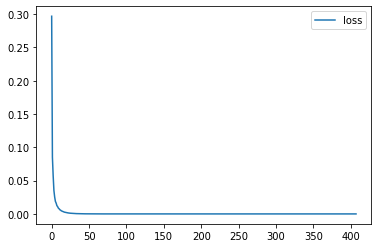

In [8]:
def Relax_Iteration(l1, l2, hx, hy, eps, w):
    x = np.arange(l1[0], l1[1], hx)
    y = np.arange(l2[0], l2[1], hy)
    n_x = len(x)
    n_y = len(y)
    u_0_j = np.array([phi1(i) for i in y])
    u_l_j = np.array([phi2(i) for i in y])
    u_i_0 = np.array([phi3(i) for i in x])
    u_i_l = np.array([phi4(i) for i in x])

    u_k = np.array([np.zeros_like(u_i_0) for _ in range(n_y)], dtype=np.float64)
    u_k[0] = np.array(u_i_0)
    u_k[-1] = np.array(u_i_l)
    u_k = u_k.T
    u_k[0] = np.array(u_0_j)
    u_k[-1] =np.array(u_l_j)
    
    all_loss = []

    while(True):
        u_k_pred = np.copy(u_k)
        loss = 0
        for i in range(1, n_x - 1):
            for j in range(1, n_y - 1):
                u_pred = u_k_pred[i+1][j] * (1/hx**2 - a/hx) + u_k_pred[i-1][j] * (1/hx**2 + a/hx) + u_k_pred[i][j+1] * (1/hy**2 - b/hy) + u_k_pred[i][j-1] * (1/hy**2 + b/hy)
                u_pred /= (2 / hx**2 + 2 / hy**2 + c)
                u_k[i][j] = w * u_pred + (1 - w) * u_k_pred[i][j]

                loss = max(u_k[i][j] - u_k_pred[i][j], loss)
        all_loss += [loss]
        if (all_loss[-1] <= eps) : break

    plt.plot(np.arange(len(all_loss)), all_loss, label = 'loss')
    plt.legend()
    return u_k


hx, hy = math.pi / 20, math.pi / 20
eps = 0e-100
w = 1
u_pred_r = Relax_Iteration(l1, l2, hx, hy, eps, w = 1)


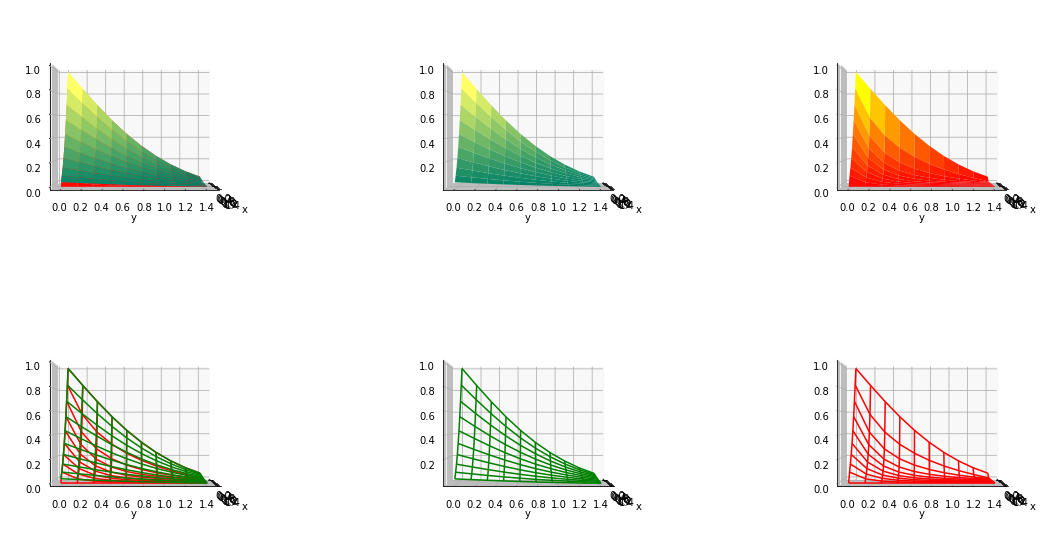

In [12]:
X_r, Y_r, U_true_r, U_pred_r = get_point(l1, l2, hx, hy, u_pred_r)

%matplotlib inline
def plot_met(i=0, j = 0):
    X, Y, U_true, U_pred = X_r, Y_r, U_true_r, U_pred_r
    fig = plt.figure()

    fig.set_figwidth(20)
    fig.set_figheight(10)

    ax = fig.add_subplot(2, 3, 1, projection='3d')
    ax.plot_surface(X, Y, U_pred, cmap='autumn')
    ax.plot_surface(X, Y, U_true, cmap = 'summer')
    ax.view_init(i, j)
    ax.set_xlabel('x')
    ax.set_ylabel('y');

    ax = fig.add_subplot(2, 3, 4, projection='3d')
    ax.plot_wireframe(X, Y, U_pred, color = 'r')
    ax.plot_wireframe(X, Y, U_true, color = 'g')
    ax.view_init(i, j)
    ax.set_xlabel('x')
    ax.set_ylabel('y');

    ax = fig.add_subplot(2, 3, 2, projection='3d')
    ax.plot_surface(X, Y, U_true, cmap = 'summer')
    ax.view_init(i, j)
    ax.set_xlabel('x')
    ax.set_ylabel('y');

    ax = fig.add_subplot(2, 3, 5, projection='3d')
    ax.plot_wireframe(X, Y, U_true, color = 'g')
    ax.view_init(i, j)
    ax.set_xlabel('x')
    ax.set_ylabel('y');

    ax = fig.add_subplot(2, 3, 3, projection='3d')
    ax.plot_surface(X, Y, U_pred, cmap='autumn')
    ax.view_init(i, j)
    ax.set_xlabel('x')
    ax.set_ylabel('y');

    ax = fig.add_subplot(2, 3, 6, projection='3d')
    ax.plot_wireframe(X, Y, U_pred, color = 'r')
    ax.view_init(i, j)
    ax.set_xlabel('x')
    ax.set_ylabel('y');

    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    plt.show()
    
# interact(plot_met, i = (-180, 180), j = (-180, 180));
i, j = 0, 0
fig = plt.figure()

fig.set_figwidth(20)
fig.set_figheight(10)

ax = fig.add_subplot(2, 3, 1, projection='3d')
ax.plot_surface(X, Y, U_pred, cmap='autumn')
ax.plot_surface(X, Y, U_true, cmap = 'summer')
ax.view_init(i, j)
ax.set_xlabel('x')
ax.set_ylabel('y');

ax = fig.add_subplot(2, 3, 4, projection='3d')
ax.plot_wireframe(X, Y, U_pred, color = 'r')
ax.plot_wireframe(X, Y, U_true, color = 'g')
ax.view_init(i, j)
ax.set_xlabel('x')
ax.set_ylabel('y');

ax = fig.add_subplot(2, 3, 2, projection='3d')
ax.plot_surface(X, Y, U_true, cmap = 'summer')
ax.view_init(i, j)
ax.set_xlabel('x')
ax.set_ylabel('y');

ax = fig.add_subplot(2, 3, 5, projection='3d')
ax.plot_wireframe(X, Y, U_true, color = 'g')
ax.view_init(i, j)
ax.set_xlabel('x')
ax.set_ylabel('y');

ax = fig.add_subplot(2, 3, 3, projection='3d')
ax.plot_surface(X, Y, U_pred, cmap='autumn')
ax.view_init(i, j)
ax.set_xlabel('x')
ax.set_ylabel('y');

ax = fig.add_subplot(2, 3, 6, projection='3d')
ax.plot_wireframe(X, Y, U_pred, color = 'r')
ax.view_init(i, j)
ax.set_xlabel('x')
ax.set_ylabel('y');

plt.show()